In [1]:
%cd ..

/Users/udeepa/Documents/UCL/Master's Project/prototype_4yp


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
filepaths = ['plot_data/fig2_easy/ppo_coinrun_train.csv',
             'plot_data/fig2_easy/ppo_coinrun_test.csv']
#             'plot_data/fig2_easy/ppo_maze_train.csv',
#             'plot_data/fig2_easy/ppo_maze_eval.csv']

In [4]:
data = defaultdict(list)
for filepath in filepaths:    
    exp = '_'.join(filepath.split('/')[-1].split('_')[:2])
    df = pd.read_csv(filepath).drop(columns=['Name', '_wandb'])
    
    nlevels = df.sort_values('train_num_levels').to_numpy().T[0]
    
    points = df.sort_values('train_num_levels').to_numpy().T[1]
    df_mean = np.squeeze(df.groupby('train_num_levels').mean().to_numpy())
    df_std  = np.squeeze(df.groupby('train_num_levels').std().to_numpy())
    
    data[exp].append(points)
    data[exp].append(df_mean)
    data[exp].append(df_std)

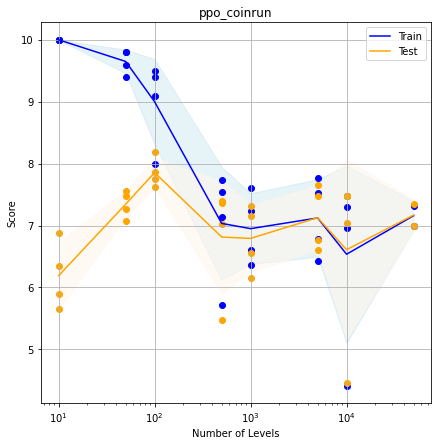

In [24]:
for key, val in data.items():
    plt.figure(figsize=(7,7))
    # plot std as shading
    plt.fill_between(np.unique(nlevels), val[1]-val[2], val[1]+val[2], color='lightblue', alpha=0.3)
    plt.fill_between(np.unique(nlevels), val[4]-val[5], val[4]+val[5], color='seashell', alpha=0.6)    
    # plot points
    plt.scatter(nlevels, val[0], color='b')
    plt.scatter(nlevels, val[3], color='orange')
    # plot mean line
    plt.plot(np.unique(nlevels), val[1], color='b', label="Train")
    plt.plot(np.unique(nlevels), val[4], color='orange', label="Test")   
    
    plt.title(key)
    plt.xlabel('Number of Levels')
    plt.ylabel('Score')      
    plt.xscale('log') 
    plt.legend()
    plt.grid()  